___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [14]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


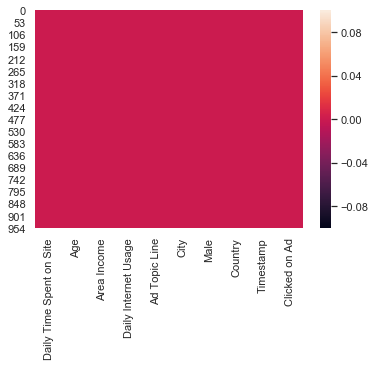

In [19]:
#checking null entry
sns.heatmap(ad_data.isnull())

In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

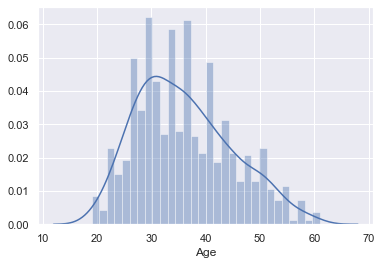

In [7]:
sns.set()
sns.set_style('darkgrid')
sns.distplot(ad_data['Age'],kde=True,bins=30)

**Create a jointplot showing Area Income versus Age.**

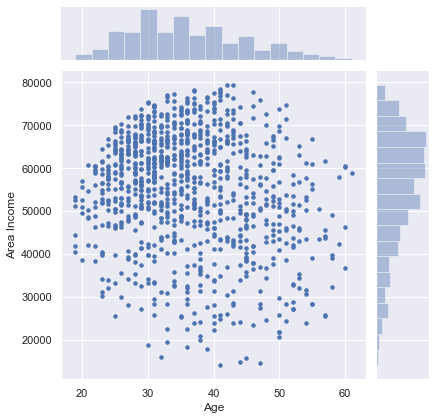

In [23]:
sns.jointplot(data=ad_data,x='Age',y='Area Income',s=12)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

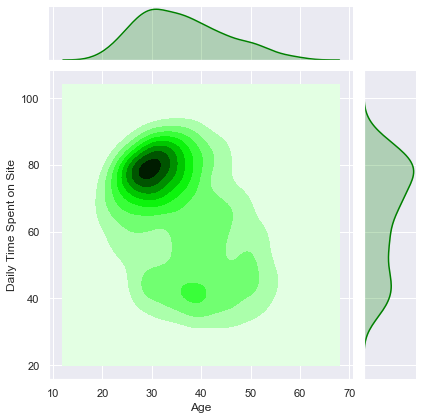

In [25]:
sns.jointplot(data=ad_data,x='Age',y='Daily Time Spent on Site',height=6,kind='kde',color='green')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

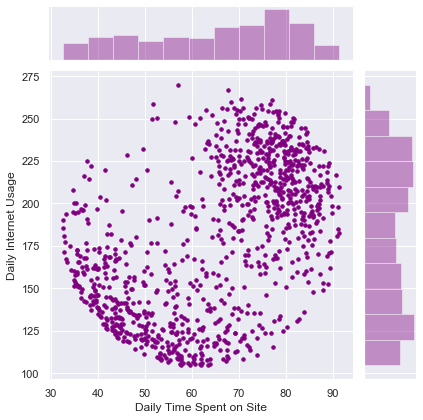

In [26]:
sns.jointplot(data=ad_data,x='Daily Time Spent on Site',y='Daily Internet Usage',height=6,kind='scatter',s=12,color='purple')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

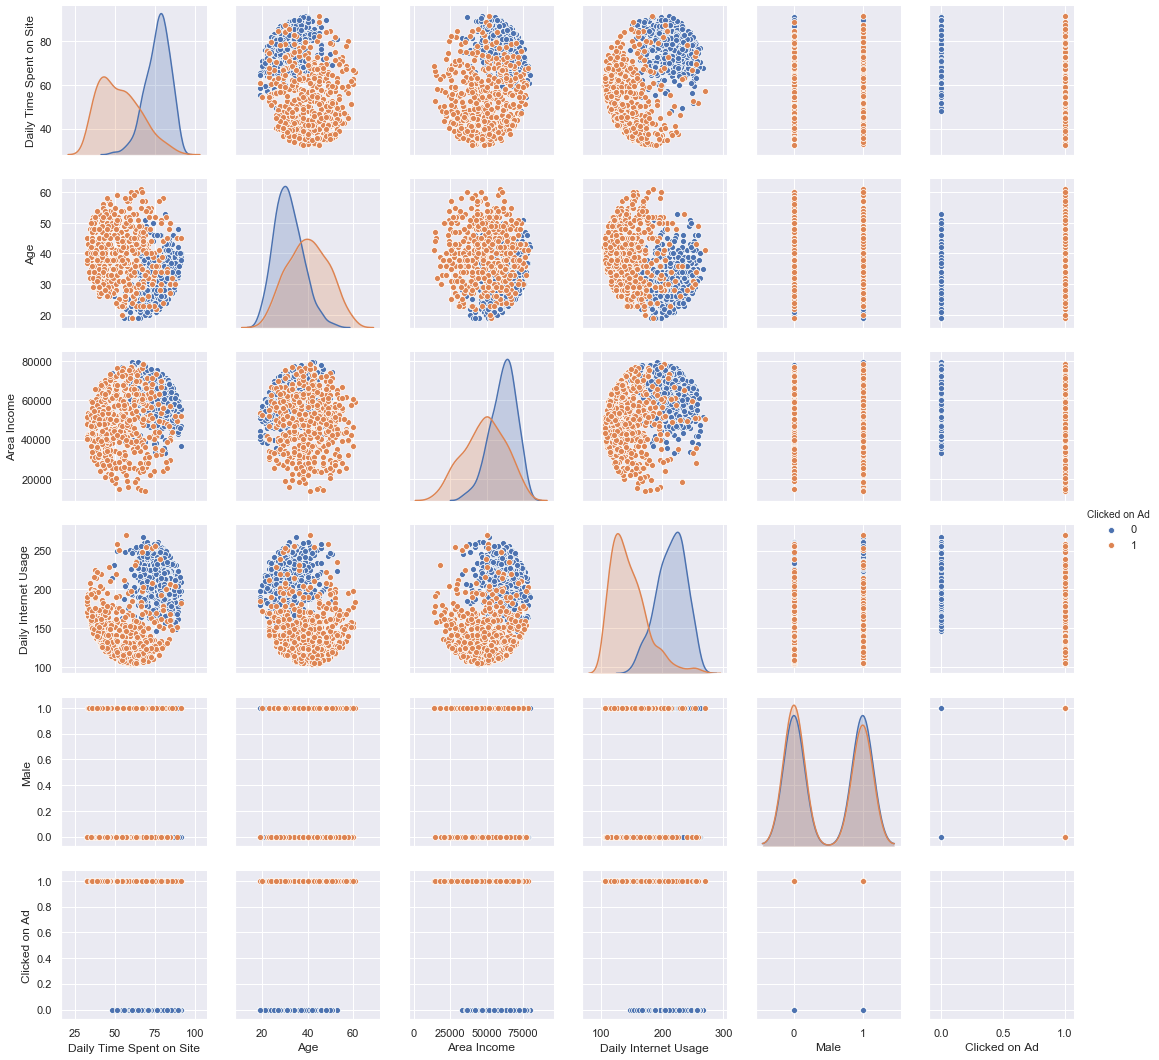

In [28]:
sns.pairplot(data=ad_data,hue='Clicked on Ad')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [31]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [136]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]
y = ad_data['Clicked on Ad']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [138]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [139]:
logmodel.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [140]:
predictions = logmodel.predict(X_test)

In [141]:
full = pd.DataFrame(data=X_test)

In [142]:
full['Prediction'] = predictions
full['Actual'] = y_test
full.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Prediction,Actual
545,42.60,55,55121.65,168.29,0,1,1
298,80.39,31,66269.49,214.74,0,0,0
109,74.02,32,72272.90,210.54,0,0,0
837,55.77,49,55942.04,117.33,1,1,1
194,77.20,33,49325.48,254.05,1,0,0


In [153]:
plt.figure(figsize=(10,3))
bypred = full.groupby(by='Prediction')
bypred.describe()['Age']


,count,mean,std,min,25%,50%,75%,max
Prediction,,,,,,,,
0,164.0,30.884146,4.648899,20.0,28.0,31.0,34.00,43.0
1,136.0,42.051471,7.009327,28.0,36.0,42.0,47.25,60.0


<Figure size 720x216 with 0 Axes>

In [154]:
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Prediction,Actual
545,42.60,55,55121.65,168.29,0,1,1
298,80.39,31,66269.49,214.74,0,0,0
109,74.02,32,72272.90,210.54,0,0,0
837,55.77,49,55942.04,117.33,1,1,1
194,77.20,33,49325.48,254.05,1,0,0
...,...,...,...,...,...,...,...
847,88.82,36,58638.75,169.10,0,0,0
682,43.57,36,50971.73,125.20,1,1,1
884,70.92,39,66522.79,249.81,1,0,0
325,36.87,36,29398.61,195.91,0,1,1


In [155]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
290,50.52,31,72270.88,171.62,0
167,86.06,31,53767.12,219.72,1
486,83.97,40,66291.67,158.42,1
683,76.83,28,67990.84,192.81,0
876,67.39,44,51257.26,107.19,0
...,...,...,...,...,...
575,48.86,54,53188.69,134.46,0
838,44.13,40,33601.84,128.48,1
337,75.32,28,59998.50,233.60,1
523,67.94,43,68447.17,128.16,0


In [156]:
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

** Create a classification report for the model.**

In [157]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,predictions))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



[[149   8]
 [ 15 128]]


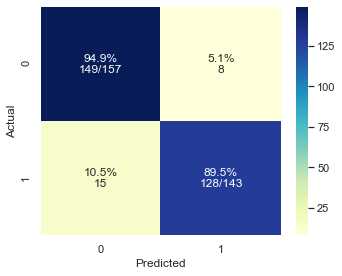

In [158]:
from sklearn.metrics import confusion_matrix 
#matrix = cm(y_test, predictions, labels=None, sample_weight=None)
def plot_cm(y_true, predictions, figsize=(5,4)):
    cm = confusion_matrix(y_test, predictions, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    annot_kws = {"ha": 'left',"va": 'bottom'}
    
    ae = sns.heatmap(cm, cmap= "YlGnBu", annot=annot,fmt='', ax=ax)
    bottom, top = ae.get_ylim()
    ae.set_ylim(bottom + 0.5, top - 0.5)
print(cm(y_test,predictions))
plot_cm(y_test, predictions)
plt.tight_layout()

## Great Job!